In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import os
import random
import shutil
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import ultralytics
import glob
from ultralytics import YOLO

In [ ]:
SEED=88
BATCH_SIZE=16
BASE_MODEL='yolov9e'
BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
EPOCHS = 15
EXP_NAME = f'ppe_css_{EPOCHS}_epochs'
OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
LR = 1e-3
LR_FACTOR = 0.01
WEIGHT_DECAY = 5e-4
DROPOUT = 0.0
PATIENCE = 20
PROFILE = False
LABEL_SMOOTHING = 0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Посмотрим на входные изображения

In [ ]:
!ls /content/drive/MyDrive/hemangiomas/train | wc
!ls /content/drive/MyDrive/hemangiomas/val | wc


   1669    9940  116026
    662    1224   14392


In [ ]:
image_path='/content/drive/MyDrive/hemangiomas/train/01_thigh.jpeg'

In [ ]:
def get_image_properties(image_path):
    img = cv2.imread(image_path)
    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }
    return properties

In [ ]:
img_properties = get_image_properties(image_path)
img_properties

{'width': 224, 'height': 224, 'channels': 3, 'dtype': dtype('uint8')}

In [ ]:
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()

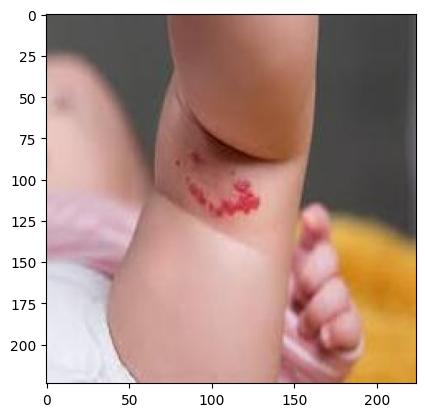

In [ ]:
example_image_path = '/content/drive/MyDrive/hemangiomas/train/01_thigh.jpeg'
display_image(example_image_path)

# Предскажем на случайном изображении

In [ ]:
print("model:",BASE_MODEL_WEIGHTS)


model: yolov9e.pt


In [ ]:
print("epochs:", EPOCHS)
print("batch size:", BATCH_SIZE)

epochs: 15
batch size: 16


In [ ]:
model=YOLO(BASE_MODEL_WEIGHTS)

100%|██████████| 112M/112M [00:00<00:00, 187MB/s]


# Приступим к тренировке модели

In [ ]:
OUTPUT_DIR = './'
CUSTOM_DATASET_DIR = '/content/drive/MyDrive/hemangiomas'

In [ ]:
model.train(
    data = os.path.join(OUTPUT_DIR, '/content/drive/MyDrive/hemangiomas/data.yaml' ),
    task = 'detect',
    imgsz = (img_properties['height'], img_properties['width']),

    epochs = EPOCHS,
    batch = BATCH_SIZE,
    optimizer = OPTIMIZER,
    lr0 = LR,
    lrf = LR_FACTOR,
    weight_decay = WEIGHT_DECAY,
    dropout = DROPOUT,
    patience = PATIENCE,
    profile = PROFILE,
    label_smoothing = LABEL_SMOOTHING,

    name = f'{BASE_MODEL}_{EXP_NAME}',
    seed = SEED,

    val = True,
    amp = True,
    exist_ok = True,
    resume = False,
    verbose = False,
)



Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/content/drive/MyDrive/hemangiomas/data.yaml, epochs=3, time=None, patience=20, batch=16, imgsz=(224, 224), save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=yolov9e_ppe_css_3_epochs, exist_ok=True, pretrained=True, optimizer=auto, verbose=False, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /content/drive/MyDrive/hemangiomas/train.cache... 796 images, 91 backgrounds, 0 corrupt: 100%|██████████| 886/886 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/hemangiomas/val.cache... 332 images, 10 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov9e_ppe_css_3_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/yolov9e_ppe_css_3_epochs
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.358      1.328      1.477         12        224: 100%|██████████| 56/56 [31:06<00:00, 33.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [05:36<00:00, 30.58s/it]

                   all        332        384     0.0608       0.33     0.0433     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.385      1.389      1.517         22        224: 100%|██████████| 56/56 [30:06<00:00, 32.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [05:21<00:00, 29.27s/it]

                   all        332        384      0.249     0.0648     0.0556     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G        1.3      1.258      1.475          8        224: 100%|██████████| 56/56 [29:37<00:00, 31.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [05:21<00:00, 29.21s/it]

                   all        332        384      0.736      0.657      0.708      0.444



3 epochs completed in 1.841 hours.
Optimizer stripped from runs/detect/yolov9e_ppe_css_3_epochs/weights/last.pt, 117.2MB
Optimizer stripped from runs/detect/yolov9e_ppe_css_3_epochs/weights/best.pt, 117.2MB

Validating runs/detect/yolov9e_ppe_css_3_epochs/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv9e summary (fused): 687 layers, 57,377,942 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [04:59<00:00, 27.21s/it]


                   all        332        384      0.736      0.658      0.708      0.444
Speed: 0.4ms preprocess, 885.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/yolov9e_ppe_css_3_epochs


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2127ffbdc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

In [ ]:
results_paths = [
    i for i in
    glob.glob(f'{OUTPUT_DIR}runs/detect/{BASE_MODEL}_{EXP_NAME}/*.png') +
    glob.glob(f'{OUTPUT_DIR}runs/detect/{BASE_MODEL}_{EXP_NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

['./runs/detect/yolov9e_ppe_css_3_epochs/results.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/confusion_matrix.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/PR_curve.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/P_curve.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/confusion_matrix_normalized.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/F1_curve.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/R_curve.png',
 './runs/detect/yolov9e_ppe_css_3_epochs/labels.jpg',
 './runs/detect/yolov9e_ppe_css_3_epochs/labels_correlogram.jpg']

In [ ]:
for file in sorted(results_paths):
    print(file)
    display_image(file)
    print('\n')

In [ ]:
df = pd.read_csv(f'{OUTPUT_DIR}runs/detect/{BASE_MODEL}_{EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{OUTPUT_DIR}training_log_df.csv', index=False)
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.4044,1.8465,1.4814,0.00419,0.34678,0.00250,0.00069,4.6053,416340.0000,9440.8000,0.000546,0.000546,0.000546
1,2,1.5494,1.6581,1.6496,0.00130,0.33707,0.00129,0.00037,3.7206,541160.0000,13884.0000,0.000738,0.000738,0.000738
2,3,1.4250,1.4540,1.5578,0.05633,0.39832,0.04200,0.01826,2.0682,71.7230,12.1470,0.000563,0.000563,0.000563
3,1,1.3576,1.3283,1.4768,0.06077,0.32972,0.04329,0.01668,2.5924,211.9700,11.6770,0.000546,0.000546,0.000546
4,2,1.3848,1.3889,1.5169,0.24895,0.06484,0.05557,0.03092,3.6830,4.9314,7.6339,0.000738,0.000738,0.000738
5,3,1.3002,1.2579,1.4751,0.73598,0.65747,0.70837,0.44402,1.3382,1.2263,1.5857,0.000563,0.000563,0.000563


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

### Training and Validation box_loss
ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='Training box_loss', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='Validation box_loss', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

### Training and Validation cls_loss
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='Training cls_loss', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='Validation cls_loss', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

### Training and Validation dfl_loss
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='Training dfl_loss', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='Validation dfl_loss', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Training Metrics vs. Epochs')
plt.show()

In [ ]:
validation_results_paths = [
    i for i in
    glob.glob(f'{OUTPUT_DIR}runs/detect/{BASE_MODEL}_{EXP_NAME}/*.png') +
    glob.glob(f'{OUTPUT_DIR}runs/detect/{BASE_MODEL}_{EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

6

In [ ]:
if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])

./runs/detect/yolov9e_ppe_css_3_epochs/val_batch2_labels.jpg


./runs/detect/yolov9e_ppe_css_3_epochs/val_batch2_labels.jpg


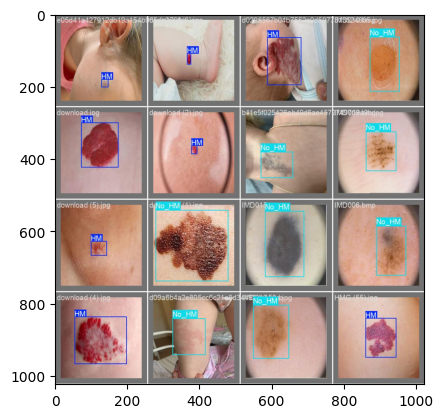

In [ ]:
### check predictions or labels from a random validation batch
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path)

In [ ]:
example_image_path='/content/drive/MyDrive/hemangiomas/val/m_dst10193f7.png'

In [ ]:
BEST_MODEL_WEIGHTS='/content/runs/detect/yolov9e_ppe_css_15_epochs/weights/best.pt'

In [ ]:
model = YOLO(BEST_MODEL_WEIGHTS)

results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)

In [ ]:
example_image_inference_output = example_image_path.split('/')[-1]
display_image(f'/content/runs/detect/predict/{example_image_inference_output}')

In [ ]:
model.save('leaf_model.h5')